To do the K-Nearest Neighbour:

Step 1: Choose the number K of Neighbors

Step 2: Take the K-Nearest neighbours of the new data point according the euclidean distance.

Step 3: Among the K-Neighbors, count the no. of data point in each category.

Step 4: Assign the new data point to the category where you counted the most neighbors.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

#splitting the dataset
from sklearn.cross_validation import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25, random_state = 0)

#feature scaling the data
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
trainx = scx.fit_transform(trainx)
testx = scx.transform(testx)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
#p =2 is for euclidean distance:
reg = KNeighborsClassifier(n_neighbors = 5, p =2, metric = 'minkowski')
model = reg.fit(trainx, trainy)

In [8]:
from sklearn.metrics import confusion_matrix
predy = model.predict(testx)
cm = confusion_matrix(testy, model.predict(testx))
pd.DataFrame(cm)

,0,1
0,64,4
1,3,29


In [19]:
from matplotlib.colors import ListedColormap
x_set = testx
y_set = testy
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01)
                    ,np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step = 0.01))


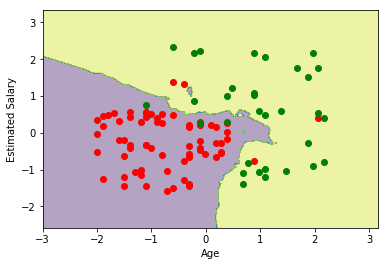

In [20]:
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.4)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
x_setd = pd.DataFrame(x_set)
x_p = x_setd.loc[(y_set ==0), :].values
x_n = x_setd.loc[(y_set ==1), :].values



plt.scatter(x_p[:, 0], x_p[:, 1], color = 'red')
plt.scatter(x_n[:, 0], x_n[:, 1], color = 'green')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()